In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn import tree

In [6]:
from sklearn.model_selection import train_test_split , GridSearchCV

In [7]:
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve

In [8]:
from pandas_profiling import ProfileReport

In [9]:
import sklearn                           #importing just matlplotlib 
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

In [10]:
df=pd.read_csv('winequality-red.csv',sep=';')

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
set(df.quality)       #total 6 classess

{3, 4, 5, 6, 7, 8}

In [14]:
# ProfileReport(df)

In [15]:
x=df.drop(columns='quality')

In [16]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
y=df['quality']

In [18]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=30)  #test75% and train25%

In [20]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
...,...,...,...,...,...,...,...,...,...,...,...
919,8.4,0.620,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0
941,9.9,0.270,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5


In [21]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1147,10.0,0.410,0.45,6.20,0.071,6.0,14.0,0.99702,3.21,0.49,11.8
659,7.1,0.840,0.02,4.40,0.096,5.0,13.0,0.99700,3.41,0.57,11.0
871,6.9,0.560,0.03,1.50,0.086,36.0,46.0,0.99522,3.53,0.57,10.6
1333,9.1,0.775,0.22,2.20,0.079,12.0,48.0,0.99760,3.18,0.51,9.6
1411,6.4,0.470,0.40,2.40,0.071,8.0,19.0,0.99630,3.56,0.73,10.6
...,...,...,...,...,...,...,...,...,...,...,...
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2
490,9.3,0.775,0.27,2.80,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
575,12.3,0.270,0.49,3.10,0.079,28.0,46.0,0.99930,3.20,0.80,10.2
1051,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2


In [22]:
y_train

1178    5
1189    4
161     4
109     5
961     5
       ..
919     6
1164    5
500     6
941     7
421     7
Name: quality, Length: 1199, dtype: int64

In [23]:
y_test

1147    7
659     4
871     5
1333    5
1411    6
       ..
721     5
490     6
575     6
1051    5
1212    6
Name: quality, Length: 400, dtype: int64

In [24]:
dt_model=DecisionTreeClassifier()

In [25]:
dt_model

DecisionTreeClassifier()

In [26]:
dt_model.fit(x_train,y_train) #creating model

DecisionTreeClassifier()

[Text(610.2515231601033, 1057.0, 'X[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(355.4574523886378, 996.6, 'X[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(221.2389848289219, 936.2, 'X[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(80.69956423499032, 875.8, 'X[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(56.36136216914139, 815.4000000000001, 'X[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(19.21239509360878, 755.0, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(11.527437056165269, 694.6, 'X[6] <= 29.5\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(7.684958037443512, 634.2, 'X[7] <= 0.997\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(3.842479018721756, 573.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(11.5274370561652

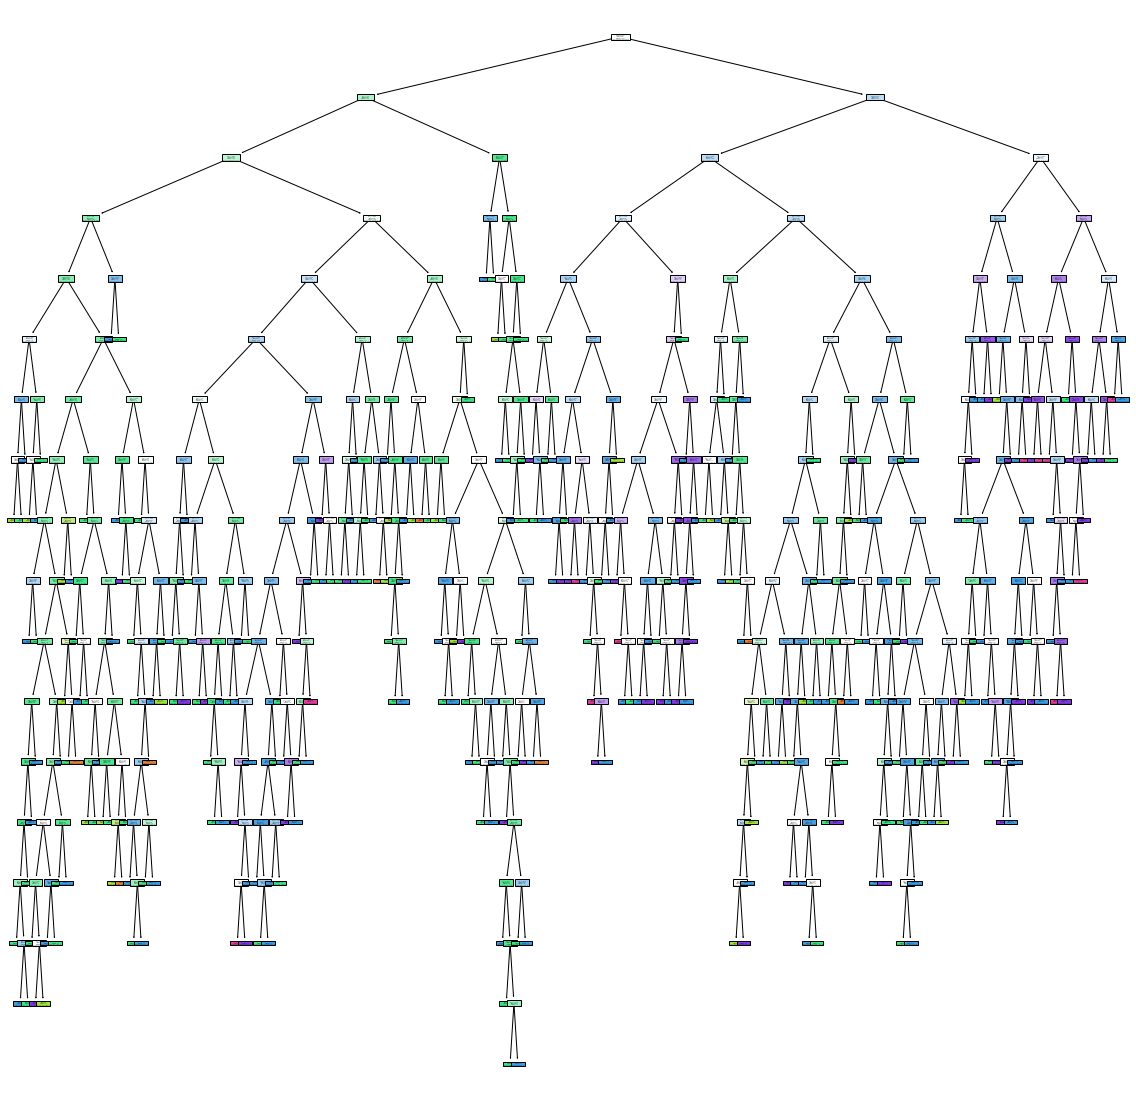

In [27]:
plt.figure(figsize=(20,20)) 
tree.plot_tree(dt_model,filled=True)         #It will make a Tree

In [28]:
 df1=df.head(500)

In [29]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8
496,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.9984,3.43,0.65,9.0,6
497,7.2,0.34,0.32,2.5,0.090,43.0,113.0,0.9966,3.32,0.79,11.1,5
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8


In [30]:
x1=df1.drop(columns='quality')

In [31]:
y1=df1.quality

In [32]:
x1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0
496,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.9984,3.43,0.65,9.0
497,7.2,0.34,0.32,2.5,0.090,43.0,113.0,0.9966,3.32,0.79,11.1
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0


In [33]:
y1

0      5
1      5
2      5
3      6
4      5
      ..
495    8
496    6
497    5
498    8
499    6
Name: quality, Length: 500, dtype: int64

In [34]:
dt_model1=DecisionTreeClassifier()

In [35]:
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

[Text(514.223745242626, 1055.2235294117647, 'alcohol <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]\nclass = 5'),
 Text(321.0756422454805, 991.2705882352941, 'total sulfur dioxide <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]\nclass = 5'),
 Text(206.7944814462417, 927.3176470588236, 'citric acid <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]\nclass = 5'),
 Text(95.03520456707898, 863.364705882353, 'alcohol <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]\nclass = 5'),
 Text(33.9790675547098, 799.4117647058824, 'sulphates <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]\nclass = 6'),
 Text(25.48430066603235, 735.4588235294118, 'sulphates <= 0.515\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]\nclass = 4'),
 Text(16.9895337773549, 671.5058823529412, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]\nclass = 4'),
 Text(33.9790675547098, 671.5058823529412, 'gini = 0.0\nsamples = 

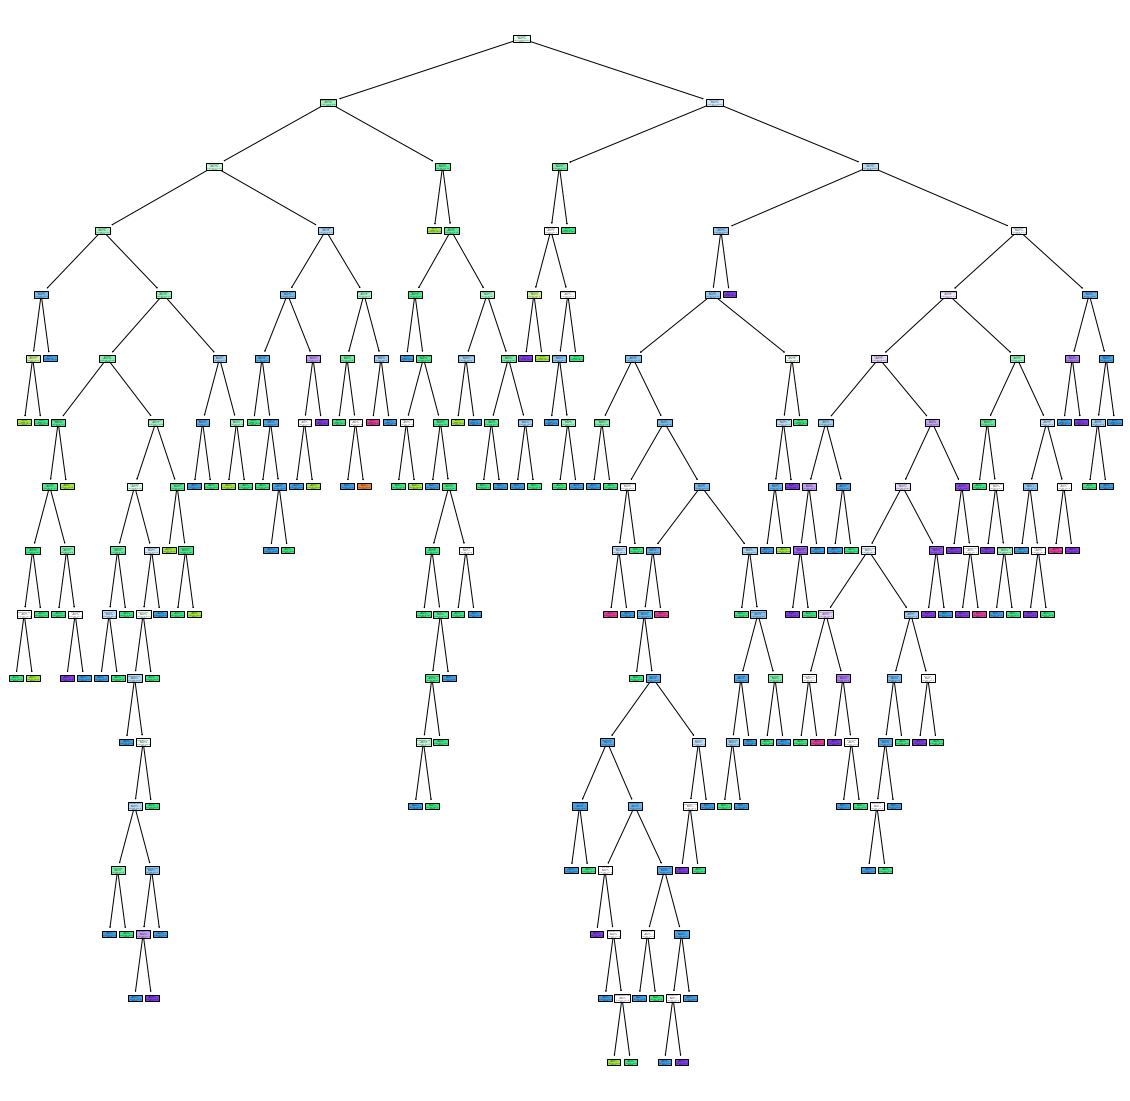

In [36]:
plt.figure(figsize=(20,20)) 
tree.plot_tree(dt_model1,filled=True,class_names=[str(i) for i in set(y1)],feature_names=x1.columns)         #It will make a Tree 
                                                                                                             #clearly visible

In [37]:
plt.savefig('dt_model_1')  #download the tree 

<Figure size 432x288 with 0 Axes>

In [38]:
#testing dt_model1

In [39]:
dt_model.predict(x1)    

array([5, 5, 5, 6, 5, 5, 6, 7, 7, 5, 4, 5, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 6, 5, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 4, 5, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 4, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 6, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 6, 4, 5, 5,
       5, 7, 5, 8, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6,

In [40]:
dt_model1.score(x1,y1)   #100%accuracy

1.0

In [41]:
dt_model1.score(x_test,y_test)  #46% accuracy 
#conclusion over fitted model so dont accept this model

0.5975

In [42]:
#Calculating CCP

In [43]:
path=dt_model.cost_complexity_pruning_path(x1,y1)

In [44]:
path

{'ccp_alphas': array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
        0.00188235, 0.00192308, 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.00261111, 0.00262769, 0.00266667,
        0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
        0.00266667, 0.00266667, 0.00271329, 0.00272222, 0.00283333,
        0.00285714, 0.003     , 0.003     , 0.003     , 0.003     ,
        0.00304762, 0.00305051, 0.00308418, 0.00328205, 0.00333333,
        0.00333333, 0.00334032, 0.00336606, 0.00342857, 0.00343316,
        0.0035    , 0.0035    , 0.0036    , 0.00363636, 0.00373333,
        0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
        0.00428571, 0.00428571, 0.00437662, 0.00462338, 0.00465709,
        0.00466667, 0.0048    , 0.00487179, 0.00504242, 0.00508235,
        0.00509091, 0.00510606, 0.00516667, 0.00568485, 0.00589394,
        0.00656364, 0.00671079, 0.

In [45]:
ccp_alpha = path['ccp_alphas']

In [46]:
ccp_alpha

array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
       0.00188235, 0.00192308, 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.00261111, 0.00262769, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00271329, 0.00272222, 0.00283333,
       0.00285714, 0.003     , 0.003     , 0.003     , 0.003     ,
       0.00304762, 0.00305051, 0.00308418, 0.00328205, 0.00333333,
       0.00333333, 0.00334032, 0.00336606, 0.00342857, 0.00343316,
       0.0035    , 0.0035    , 0.0036    , 0.00363636, 0.00373333,
       0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
       0.00428571, 0.00428571, 0.00437662, 0.00462338, 0.00465709,
       0.00466667, 0.0048    , 0.00487179, 0.00504242, 0.00508235,
       0.00509091, 0.00510606, 0.00516667, 0.00568485, 0.00589394,
       0.00656364, 0.00671079, 0.0067591 , 0.00688352, 0.00688

In [47]:
dt_model2=[]                 #Creating multiple ccp models 
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)

In [48]:
dt_model2        #Now select a model which has least 

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.0018500000000000005),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.0026111111111111114),
 DecisionTreeClassifier(ccp_alpha=0.0026276923076923083),
 DecisionTreeClassifier(ccp_alpha=0.0026666666666666666),
 DecisionTreeClassifier(ccp_alpha=0.0026666666

In [49]:
#Plot a graph to get relation between x_train , y_train , ccp_alpha

In [50]:
train_score=[i.score(x1,y1) for i in dt_model2]

In [51]:
train_score

[1.0,
 0.996,
 0.994,
 0.992,
 0.992,
 0.99,
 0.986,
 0.964,
 0.964,
 0.962,
 0.962,
 0.966,
 0.964,
 0.96,
 0.96,
 0.964,
 0.96,
 0.952,
 0.946,
 0.932,
 0.93,
 0.93,
 0.928,
 0.93,
 0.93,
 0.934,
 0.93,
 0.928,
 0.924,
 0.922,
 0.92,
 0.918,
 0.916,
 0.914,
 0.912,
 0.912,
 0.908,
 0.908,
 0.906,
 0.898,
 0.898,
 0.894,
 0.898,
 0.888,
 0.886,
 0.88,
 0.882,
 0.88,
 0.882,
 0.88,
 0.868,
 0.866,
 0.86,
 0.86,
 0.858,
 0.858,
 0.856,
 0.842,
 0.838,
 0.824,
 0.818,
 0.824,
 0.81,
 0.804,
 0.802,
 0.794,
 0.79,
 0.786,
 0.784,
 0.78,
 0.776,
 0.776,
 0.772,
 0.768,
 0.762,
 0.758,
 0.742,
 0.728,
 0.718,
 0.698,
 0.69,
 0.682,
 0.676,
 0.676,
 0.636,
 0.596,
 0.596,
 0.596,
 0.558,
 0.478]

In [52]:
test_score=[i.score(x_test , y_test) for i in dt_model2]

In [53]:
test_score

[0.605,
 0.5825,
 0.5875,
 0.5925,
 0.5975,
 0.6075,
 0.5925,
 0.6025,
 0.6075,
 0.5925,
 0.575,
 0.5825,
 0.5875,
 0.58,
 0.5725,
 0.595,
 0.585,
 0.58,
 0.6325,
 0.615,
 0.605,
 0.5775,
 0.6,
 0.5925,
 0.5875,
 0.58,
 0.6,
 0.6125,
 0.615,
 0.59,
 0.605,
 0.605,
 0.5925,
 0.6025,
 0.59,
 0.61,
 0.58,
 0.6025,
 0.5875,
 0.5975,
 0.625,
 0.61,
 0.6225,
 0.595,
 0.62,
 0.605,
 0.615,
 0.6075,
 0.59,
 0.605,
 0.5975,
 0.5925,
 0.6175,
 0.61,
 0.605,
 0.605,
 0.61,
 0.6,
 0.6125,
 0.605,
 0.6075,
 0.61,
 0.6125,
 0.615,
 0.615,
 0.61,
 0.605,
 0.6075,
 0.6,
 0.5925,
 0.59,
 0.59,
 0.585,
 0.5825,
 0.59,
 0.5875,
 0.585,
 0.5825,
 0.5825,
 0.56,
 0.5725,
 0.5625,
 0.555,
 0.555,
 0.54,
 0.5775,
 0.5775,
 0.5775,
 0.545,
 0.4225]

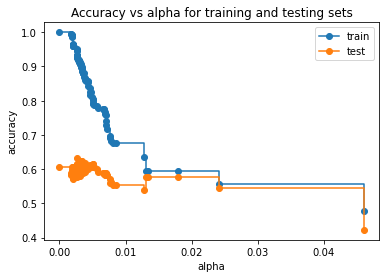

In [54]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [55]:
#conclusion 
# we have train and test much closer at 0.01 and beyond

In [56]:
dt_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha = 0.014,)  #Tuned with parameter having 0.01 alpha

In [57]:
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

[Text(558.0, 906.0, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(279.0, 543.6, 'X[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(139.5, 181.19999999999993, 'gini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(418.5, 181.19999999999993, 'gini = 0.271\nsamples = 90\nvalue = [0, 3, 76, 11, 0, 0]'),
 Text(837.0, 543.6, 'X[9] <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]'),
 Text(697.5, 181.19999999999993, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]'),
 Text(976.5, 181.19999999999993, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]')]

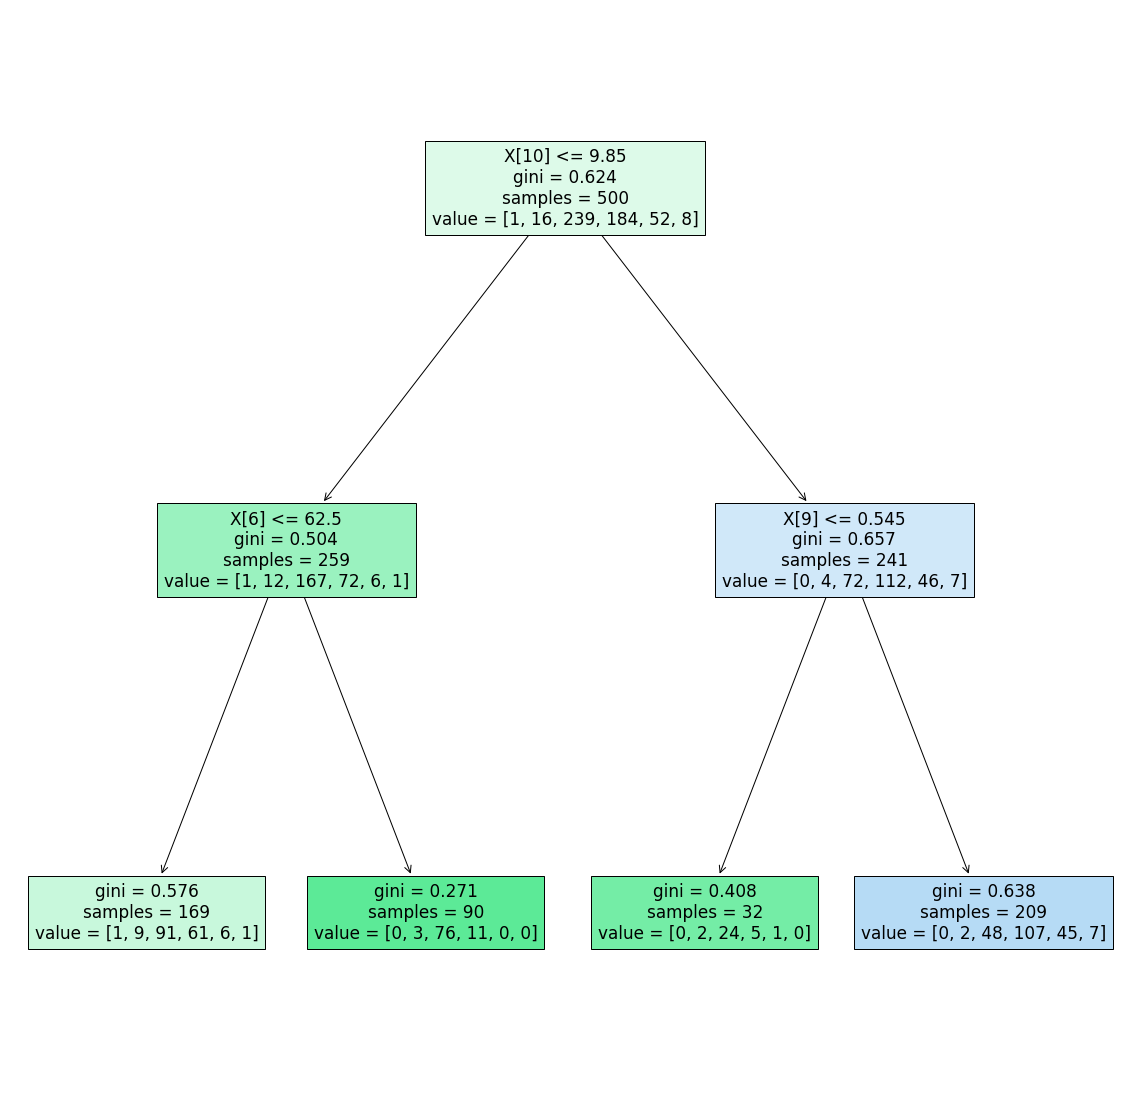

In [58]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [59]:
dt_model_ccp.score(x1,y1)     

0.596

In [60]:
dt_model_ccp.score(x_test,y_test) 

0.5775

In [61]:
#Result 
#graph has resolved complex to simplest 500samples 
#overfitting has done 59% and 57% approx 